# Lecture 9 - Motor Control
### Introduction to modeling and simulation of human movement

Desiree Miraldo  
Renato Naville Watanabe  
Marcos Duarte

https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* In class:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

### Muscle properties

In [2]:
Lslack = .223

Lce_o = .093 #optmal length

Fmax = 3000


### Initial conditions

In [3]:
LceNorm = .087/Lce_o
t0 = 0
tf = 2.99
h = 1e-3

In [4]:
t = np.arange(t0,tf,h)
F = np.empty(t.shape)
Fkpe = np.empty(t.shape)
fiberLength = np.empty(t.shape)
fiberLength = np.empty_like(t)
tendonLength = np.empty(t.shape)

In [5]:
def computeTendonForce(LseeNorm, Lslack, Lce_o):
    '''
    Compute Tendon Force
    
    Inputs:
    
    LseeNorm - Normalized Tendon  length
    
    Lslack - slack length of the tendon (non-normalized)
    
    Lce_o - Optimal length of the fiber
    
    Output:
    
    FtendonNorm - Normalized tendon force
    '''
    
    Umax = .04
    if LseeNorm<Lslack/Lce_o: 
        FTendonNorm = 0
    else: 
        FTendonNorm = ((LseeNorm-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
        
    return FTendonNorm

In [6]:
def computeParallelElementForce(LceNorm):
    Umax = 1
    if LceNorm < 1: 
        FkpeNorm = 0
    else: 
        FkpeNorm = ((LceNorm-1)/(Umax))**2 
        
    return FkpeNorm

In [7]:
def computeForceLengthCurve(LceNorm):
    width = .63
    FLNorm = max([0, (1-((LceNorm-1)/width)**2)])
    return FLNorm

In [8]:
def computeContractileElementDerivative(FLNorm, FCENorm):
     #calculate CE velocity from Hill's equation
    a = .25
    b = .25*10
    
    if  FCENorm > FLNorm:
        print('Error: cannot do eccentric contractions')
    
    LceNormdot = -b*(FLNorm-FCENorm)/(a+FCENorm) 
    
    return LceNormdot

In [9]:
def computeContractileElementForce(FtendonNorm, FkpeNorm):
    FCENorm = FtendonNorm - FkpeNorm
    return FCENorm

In [10]:
def computeTendonLength(Lm, Lce_o, LceNorm):
    LseeNorm = Lm/Lce_o - LceNorm
    return LseeNorm

## Simulation - Parallel

In [11]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 - .04*(t[i]-1)
        #print(Lm)
    ########################################################
    LseeNorm = computeTendonLength(Lm, Lce_o, LceNorm)
    
    FTendonNorm = computeTendonForce(LseeNorm, Lslack, Lce_o)
        
    FkpeNorm = computeParallelElementForce(LceNorm)
      
    FLNorm = computeForceLengthCurve(LceNorm)    
    
    FCENorm = computeContractileElementForce(FTendonNorm, FkpeNorm)
    
    LceNormdot = computeContractileElementDerivative(FLNorm, FCENorm)
    
    LceNorm = LceNorm + h*LceNormdot
    #########################################################################
    F[i] = FTendonNorm * Fmax
    fiberLength[i] = LceNorm * Lce_o
    tendonLength[i] = LseeNorm * Lce_o
    

## Plot 

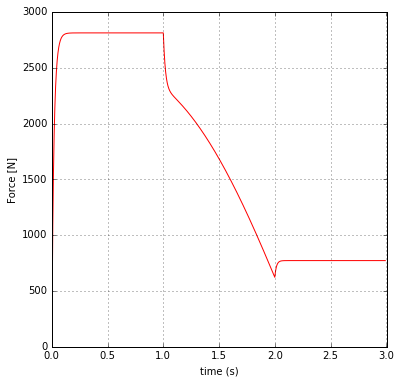

In [12]:
plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)


ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')


#ax.legend()

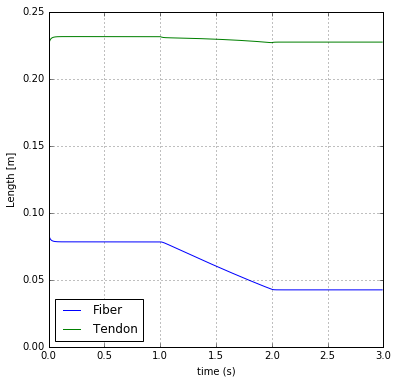

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,fiberLength, label = 'Fiber')
ax.plot(t, tendonLength, label = 'Tendon')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time (s)')
plt.ylabel('Length [m]');



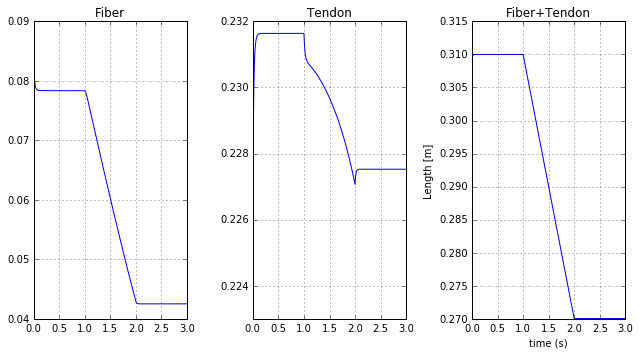

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(9, 5), sharex=True)

ax[0].plot(t, fiberLength, label = 'Fiber')
ax[0].set_title('Fiber')
ax[0].grid()
ax[1].plot(t, tendonLength, label = 'Tendon')
ax[1].set_title('Tendon')
ax[1].grid()
ax[2].plot(t, fiberLength+tendonLength, label = 'Fiber+Tendon')
ax[2].set_title('Fiber+Tendon')
ax[2].grid()
plt.xlabel('time (s)')
plt.ylabel('Length [m]')
plt.tight_layout()